### Import Library

In [408]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

# Matikan warning merah yang tidak perlu (biar notebook bersih)
warnings.filterwarnings('ignore')

# Set style plot biar ganteng
sns.set_style("whitegrid")

### Load Dataset

In [409]:
# load dataset
df = pd.read_csv("dataset/dataset_laporan_iklim_harian.csv")
df.columns

Index(['TANGGAL', 'TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'FF_X', 'FF_AVG'], dtype='object')

### EDA Dasar

In [410]:
# cek jumlah data
df.shape

(730, 8)

In [411]:
# info umum dataset
print("\n== Info Dataset ==")
df.info()

# menampilkan 10 baris pertama dataset
print("\n== 20 Baris Pertama Dataset ==")
df.head(20)


== Info Dataset ==
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TANGGAL  730 non-null    object 
 1   TN       725 non-null    float64
 2   TX       725 non-null    float64
 3   TAVG     729 non-null    float64
 4   RH_AVG   729 non-null    float64
 5   RR       695 non-null    float64
 6   FF_X     730 non-null    int64  
 7   FF_AVG   730 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 45.8+ KB

== 20 Baris Pertama Dataset ==


,TANGGAL,TN,TX,TAVG,RH_AVG,RR,FF_X,FF_AVG
0,02-02-2024,24.2,29.0,26.3,85.0,0.0,4,2
1,03-02-2024,23.6,31.7,28.0,79.0,3.9,5,2
2,04-02-2024,24.1,30.6,27.8,81.0,1.5,4,2
3,05-02-2024,23.2,31.5,28.9,74.0,16.3,5,3
4,06-02-2024,24.2,30.0,27.2,83.0,0.0,5,1
5,07-02-2024,24.0,31.0,26.5,80.0,8888.0,4,2
6,08-02-2024,23.2,31.4,28.3,74.0,15.6,3,1
7,09-02-2024,24.0,31.7,29.2,73.0,0.0,5,2
8,10-02-2024,24.2,30.0,27.4,82.0,0.0,3,2
9,11-02-2024,24.0,31.8,29.2,73.0,1.0,5,2


In [412]:
# statistik deskriptif
print("\n== Statistik Deskriptif ==")
df.describe()


== Statistik Deskriptif ==


,TN,TX,TAVG,RH_AVG,RR,FF_X,FF_AVG
count,725.000000,725.000000,729.000000,729.000000,695.000000,730.000000,730.000000
mean,23.247172,31.325103,26.865295,82.137174,442.934820,4.471233,1.897260
std,1.172243,1.341612,1.334780,6.283185,1916.781512,1.451500,0.707877
min,18.400000,24.600000,23.200000,63.000000,0.000000,2.000000,0.000000
25%,22.800000,30.600000,26.000000,78.000000,0.000000,4.000000,1.000000
50%,23.400000,31.400000,26.700000,83.000000,0.400000,4.000000,2.000000
75%,24.000000,32.200000,27.700000,87.000000,11.900000,5.000000,2.000000
max,25.600000,36.800000,30.500000,97.000000,8888.000000,13.000000,6.000000


In [413]:
# cek missing values
print("\n== Cek Missing Values ==")
df.isnull().sum()


== Cek Missing Values ==


TANGGAL     0
TN          5
TX          5
TAVG        1
RH_AVG      1
RR         35
FF_X        0
FF_AVG      0
dtype: int64

In [414]:
# cek total data 0
print("\n== Cek Total Data Nol ==")
(df == 0).sum()


== Cek Total Data Nol ==


TANGGAL      0
TN           0
TX           0
TAVG         0
RH_AVG       0
RR         337
FF_X         0
FF_AVG       4
dtype: int64

In [415]:
# cek duplikasi data
df.duplicated().sum()

np.int64(0)

### Parsing Tanggal & Time Series Index

In [416]:
# convert tanggal ke format datetime dengan dayfirst=True
# data tanggal menggunakan format dd-mm-yyyy, sehingga perlu menambahkan dayfirst=True

df["TANGGAL"] = pd.to_datetime(df["TANGGAL"], dayfirst=True)

# set sebagai index (best practice time-series)
df = df.set_index("TANGGAL").sort_index()

### Normalisasi Nilai Tidak Valid BMKG (8888 & 9999)

In [417]:
# daftar kolom numerik iklim
climate_cols = ["TN", "TX", "TAVG", "RH_AVG", "RR", "FF_X", "FF_AVG"]

# replace nilai invalid BMKG
df[climate_cols] = df[climate_cols].replace([8888, 9999], np.nan)

### Penanganan Nilai 0 (BERBASIS DOMAIN)

In [418]:
# 0 dianggap error untuk fitur-fitur ini
zero_as_nan_cols = ["TN", "TX", "TAVG", "RH_AVG", "FF_X", "FF_AVG"]

for col in zero_as_nan_cols:
    df.loc[df[col] == 0, col] = np.nan

### Validasi Missing Value

In [419]:
# validasi missing values 
print("\n== Cek Missing Values ==")
df.isnull().sum()


== Cek Missing Values ==


TN         5
TX         5
TAVG       1
RH_AVG     1
RR        69
FF_X       0
FF_AVG     4
dtype: int64

### Interpolasi Time Series

In [420]:
# interpolasi missing values dengan metode time
df_clean = df.interpolate(method="time")
df_clean.shape

(730, 7)

### Penanganan Akhir Curah Hujan (RR)

In [421]:
# ubah nilai RR yang masih NaN menjadi 0
df_clean["RR"] = df_clean["RR"].fillna(0)

### Final Validation

In [422]:
# validasi missing values setelah cleaning
print("\n== Cek Missing Values Setelah Cleaning ==")
df_clean.isna().sum()


== Cek Missing Values Setelah Cleaning ==


TN        0
TX        0
TAVG      0
RH_AVG    0
RR        0
FF_X      0
FF_AVG    0
dtype: int64

In [423]:
# display data setelah cleaning
df_clean.head(10)

,TN,TX,TAVG,RH_AVG,RR,FF_X,FF_AVG
TANGGAL,,,,,,,
2024-02-02,24.2,29.0,26.3,85.0,0.0,4.0,2.0
2024-02-03,23.6,31.7,28.0,79.0,3.9,5.0,2.0
2024-02-04,24.1,30.6,27.8,81.0,1.5,4.0,2.0
2024-02-05,23.2,31.5,28.9,74.0,16.3,5.0,3.0
2024-02-06,24.2,30.0,27.2,83.0,0.0,5.0,1.0
2024-02-07,24.0,31.0,26.5,80.0,7.8,4.0,2.0
2024-02-08,23.2,31.4,28.3,74.0,15.6,3.0,1.0
2024-02-09,24.0,31.7,29.2,73.0,0.0,5.0,2.0
2024-02-10,24.2,30.0,27.4,82.0,0.0,3.0,2.0


### Plot Suhu Minimun (TN)

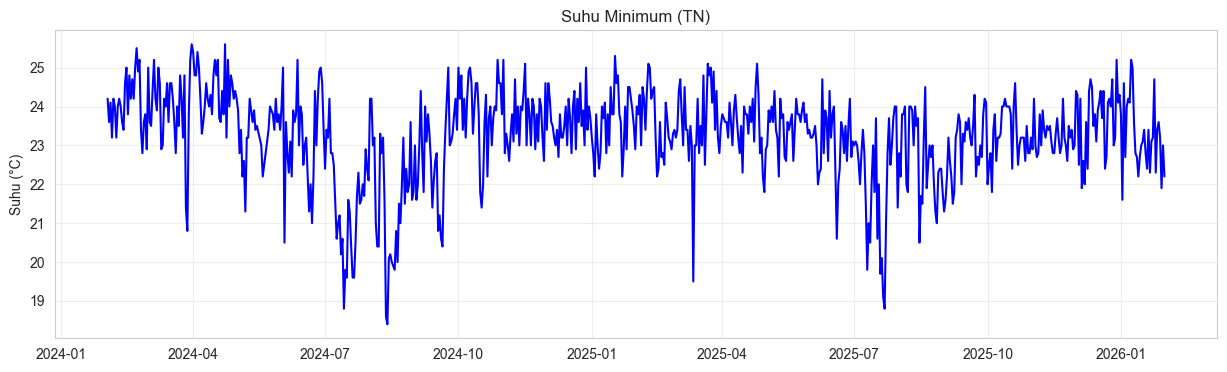

In [424]:
# Plot Suhu Minimum (TN)
plt.figure(figsize=(15, 4))
plt.plot(df_clean.index, df_clean['TN'], color='blue')
plt.title('Suhu Minimum (TN)')
plt.ylabel('Suhu (°C)')
plt.grid(True, alpha=0.3)
plt.show()

### Plot Suhu Maksimum (TX)

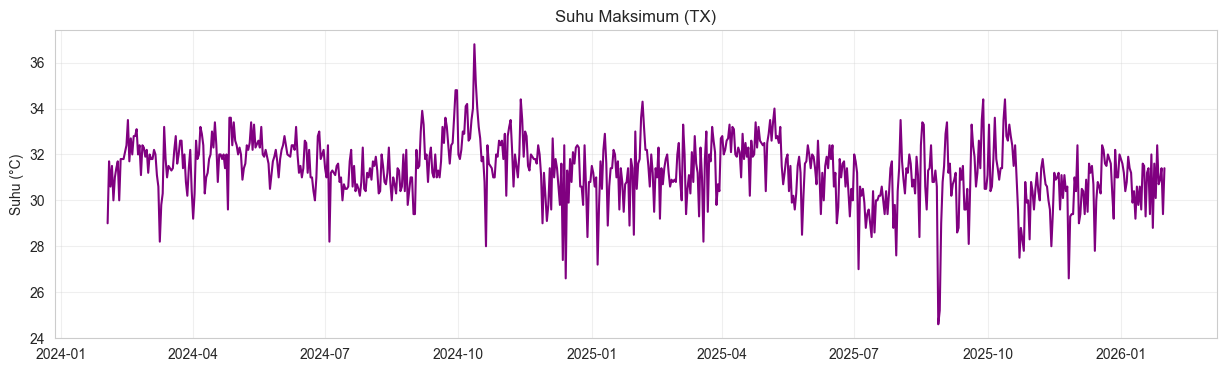

In [425]:
# Plot Suhu Maksimum (TX)
plt.figure(figsize=(15, 4))
plt.plot(df_clean.index, df_clean['TX'], color='purple')
plt.title('Suhu Maksimum (TX)')
plt.ylabel('Suhu (°C)')
plt.grid(True, alpha=0.3)
plt.show()

### Tren Temperatur Rata-rata Harian (TAVG)

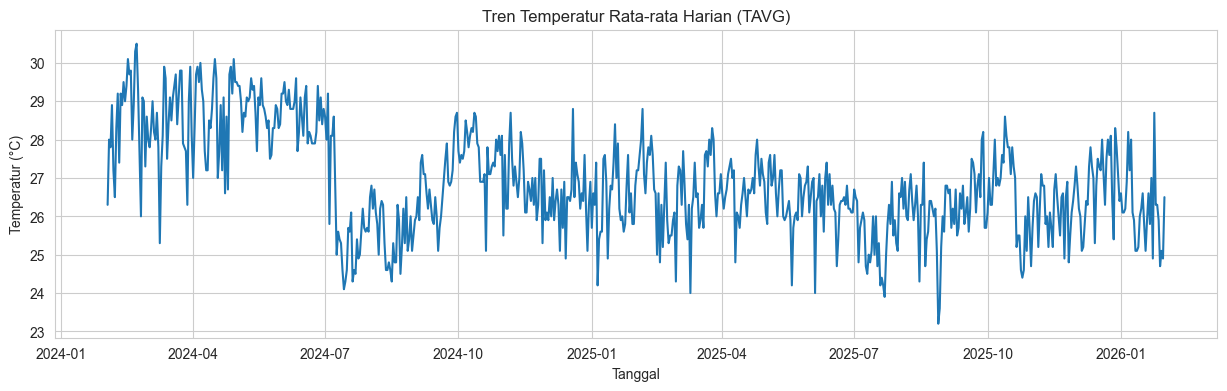

In [426]:
# Tren Temperatur Rata-rata Harian (TAVG)
plt.figure(figsize=(15, 4))
plt.plot(df_clean.index, df_clean["TAVG"])
plt.title("Tren Temperatur Rata-rata Harian (TAVG)")
plt.xlabel("Tanggal")
plt.ylabel("Temperatur (°C)")
plt.show()

### Distribusi Temperatur Rata-rata (TAVG)

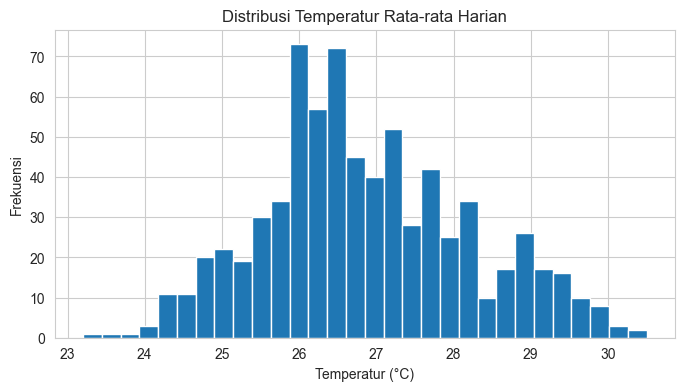

In [427]:
# Histogram Temperatur Rata-rata Harian (TAVG)
plt.figure(figsize=(8, 4))
plt.hist(df_clean["TAVG"], bins=30)
plt.title("Distribusi Temperatur Rata-rata Harian")
plt.xlabel("Temperatur (°C)")
plt.ylabel("Frekuensi")
plt.show()


### Tren TN, TX, dan TAVG (Perbandingan)

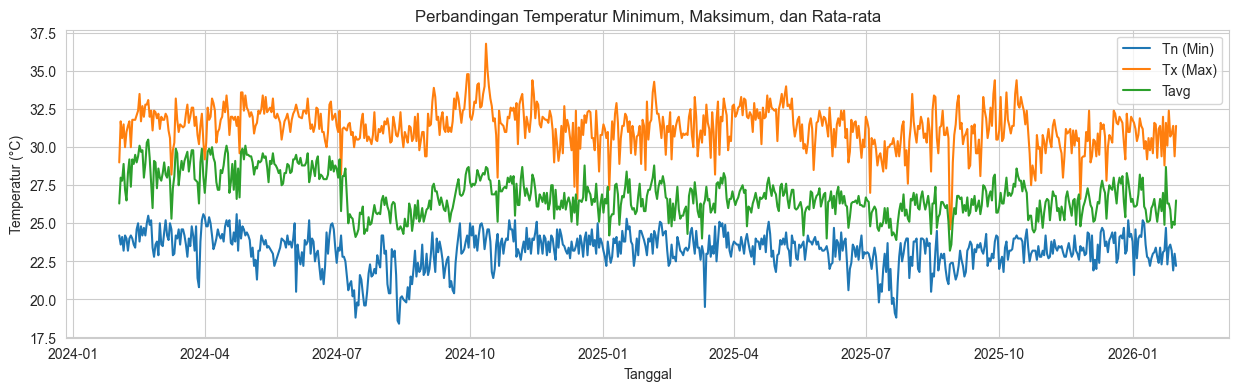

In [428]:
# Perbandingan Tren Temperatur Minimum, Maksimum, dan Rata-rata
plt.figure(figsize=(15, 4))
plt.plot(df_clean.index, df_clean["TN"], label="Tn (Min)")
plt.plot(df_clean.index, df_clean["TX"], label="Tx (Max)")
plt.plot(df_clean.index, df_clean["TAVG"], label="Tavg")
plt.legend()
plt.title("Perbandingan Temperatur Minimum, Maksimum, dan Rata-rata")
plt.xlabel("Tanggal")
plt.ylabel("Temperatur (°C)")
plt.show()


### Pola Musiman (Bulanan)

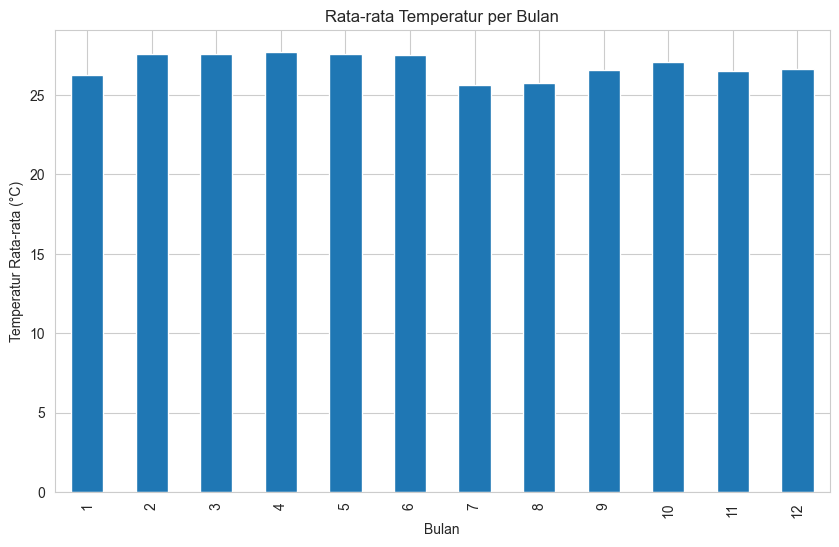

In [429]:
# Rata-rata Temperatur per Bulan
monthly_avg = df_clean.groupby(df_clean.index.month)["TAVG"].mean()

# Plot Rata-rata Temperatur per Bulan
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind="bar")
plt.title("Rata-rata Temperatur per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Temperatur Rata-rata (°C)")
plt.show()


### Curah Hujan vs Temperatur

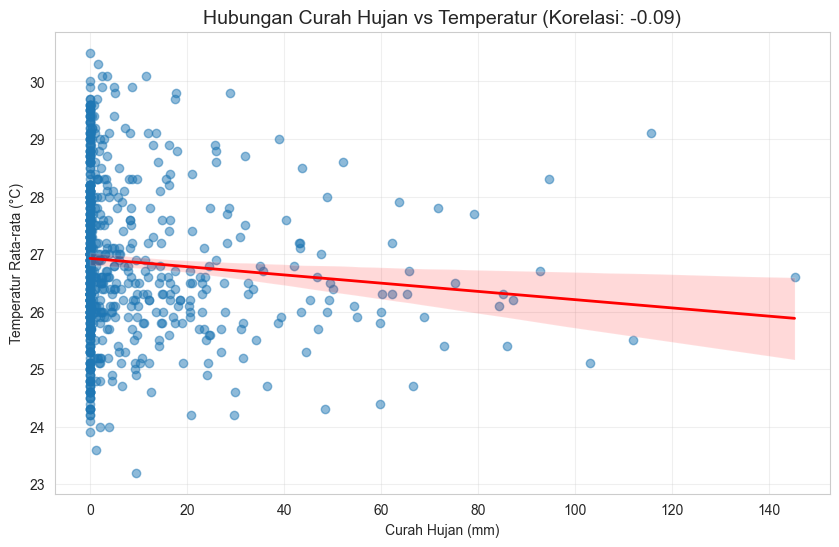

Correlation Matrix Spesifik:
            RR      TAVG
RR    1.000000 -0.094775
TAVG -0.094775  1.000000


In [430]:

# Scatter Plot: Curah Hujan vs Temperatur

plt.figure(figsize=(10, 6))

# Gunakan regplot dari Seaborn untuk otomatis menambah garis tren
sns.regplot(
    x="RR", 
    y="TAVG", 
    data=df_clean, 
    scatter_kws={'alpha':0.5, 'color':'#1f77b4'},
    line_kws={'color':'red', 'linewidth':2}
)

# Hitung korelasi spesifik untuk judul
corr_val = df_clean['RR'].corr(df_clean['TAVG'])

plt.xlabel("Curah Hujan (mm)")
plt.ylabel("Temperatur Rata-rata (°C)")
plt.title(f"Hubungan Curah Hujan vs Temperatur (Korelasi: {corr_val:.2f})", fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

# Print matriks korelasi spesifik untuk konfirmasi angka
print("Correlation Matrix Spesifik:")
print(df_clean[["RR", "TAVG"]].corr())

### Correlation Matriks Variabel Iklim

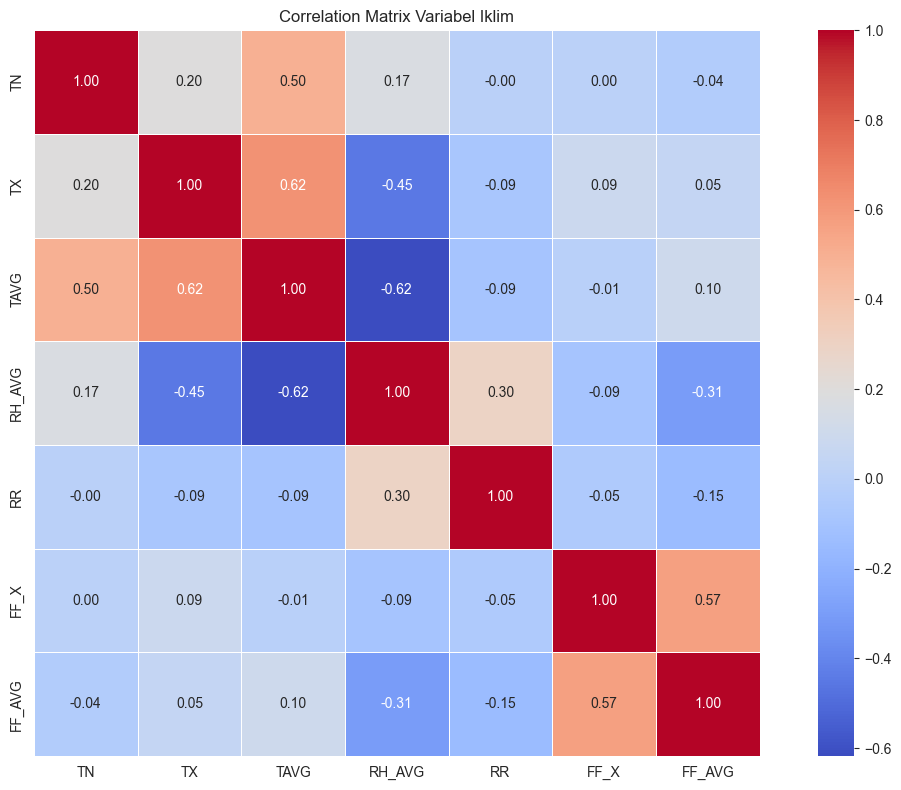

In [431]:
# Correlation Matrix Variabel Iklim
climate_features = [
    "TN", "TX", "TAVG", "RH_AVG", "RR", "FF_X", "FF_AVG"
]

plt.figure(figsize=(12, 8))
sns.heatmap(
    df_clean[climate_features].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5
)
plt.title("Correlation Matrix Variabel Iklim")
plt.tight_layout()
plt.show()

In [432]:
df_fe = df_clean.copy()

df_fe["TAVG_lag1"] = df_fe["TAVG"].shift(1)
df_fe["TAVG_lag2"] = df_fe["TAVG"].shift(2)
df_fe["TAVG_roll7"] = df_fe["TAVG"].rolling(7).mean()

df_fe["month"] = df_fe.index.month

df_fe = df_fe.dropna()

In [433]:
train_size = int(len(df_fe) * 0.8)

train = df_fe.iloc[:train_size]
test = df_fe.iloc[train_size:]

x_train = train.drop(columns=["TAVG"])
y_train = train["TAVG"]

x_test = test.drop(columns=["TAVG"])
y_test = test["TAVG"]


In [434]:
# Naive Forecasting: Menggunakan nilai TAVG hari sebelumnya sebagai prediksi
y_pred_naive = test["TAVG_lag1"]

mae_naive = mean_absolute_error(y_test, y_pred_naive)
rmse_naive = np.sqrt(mean_squared_error(y_test, y_pred_naive))

print(f"MAE Naive Forecasting: {mae_naive:.4f}")
print(f"RMSE Naive Forecasting: {rmse_naive:.4f}")


MAE Naive Forecasting: 0.7331
RMSE Naive Forecasting: 0.9480


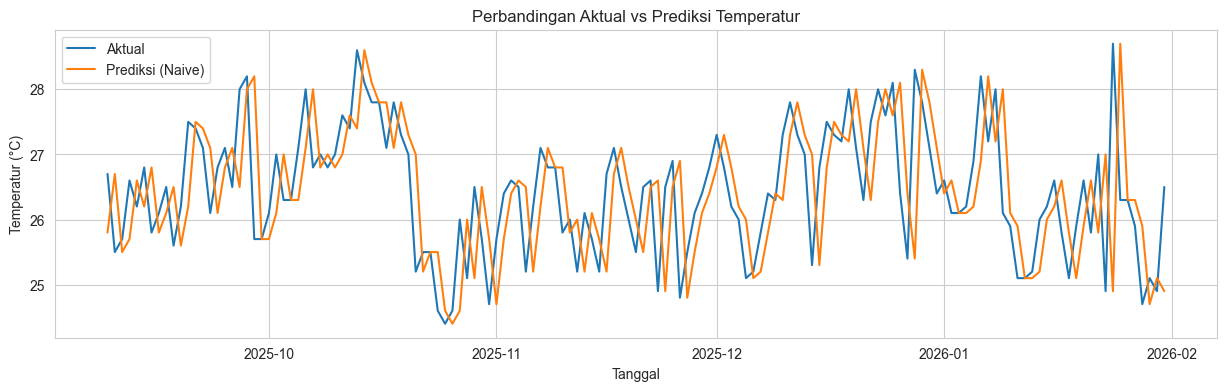

In [435]:
plt.figure(figsize=(15, 4))
plt.plot(y_test.index, y_test, label="Aktual")
plt.plot(y_test.index, y_pred_naive, label="Prediksi (Naive)")
plt.legend()
plt.title("Perbandingan Aktual vs Prediksi Temperatur")
plt.xlabel("Tanggal")
plt.ylabel("Temperatur (°C)")
plt.show()


== TABEL PERBANDINGAN PERFORMA MODEL (DATA TEST) ==
                          Model       MAE      RMSE
0                Naive Forecast  0.733103  0.947992
1  Linear Regression (Seasonal)  1.380708  1.631758


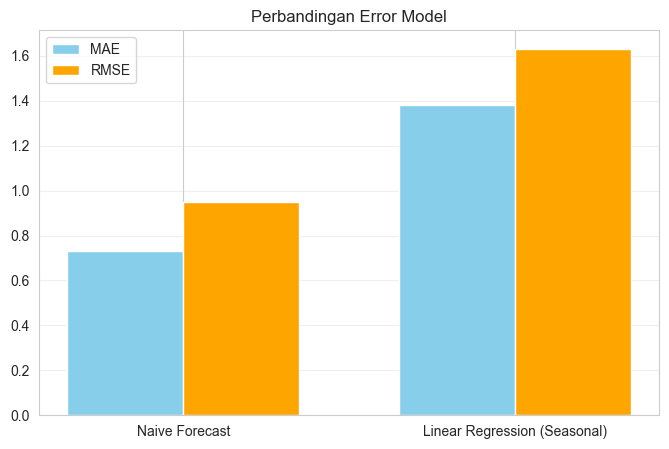

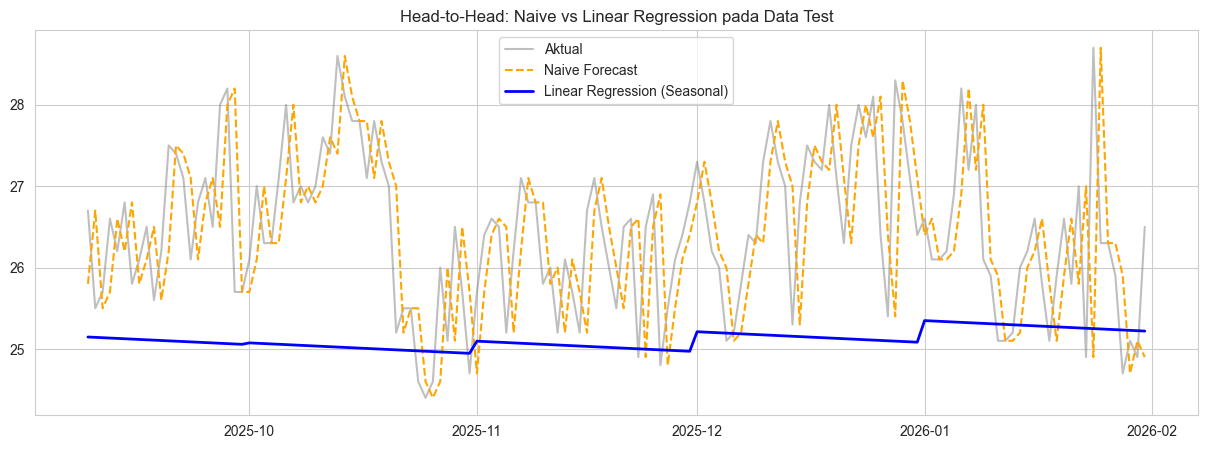

In [436]:
# ==============================================================================
# 5. KOMPARASI MODEL: NAIVE VS LINEAR REGRESSION (SEASONAL)
# ==============================================================================

# 1. Siapkan Data dengan Fitur Lengkap
df_eval = df_clean.copy()
df_eval['Date_Ordinal'] = df_eval.index.map(pd.Timestamp.toordinal)
df_eval['Month'] = df_eval.index.month
df_eval['sin_month'] = np.sin(2 * np.pi * df_eval['Month'] / 12)
df_eval['cos_month'] = np.cos(2 * np.pi * df_eval['Month'] / 12)

# 2. Split Data (80% Train, 20% Test)
train_size = int(len(df_eval) * 0.8)
train_data = df_eval.iloc[:train_size]
test_data = df_eval.iloc[train_size:]

# Definisi Fitur & Target
features = ['Date_Ordinal', 'sin_month', 'cos_month']
X_train = train_data[features]
y_train = train_data['TAVG']
X_test = test_data[features]
y_test = test_data['TAVG']

# 3. Training Model Linear Regression
model_validator = LinearRegression()
model_validator.fit(X_train, y_train)
y_pred_lr_test = model_validator.predict(X_test) # Hasil Prediksi Linear

# 4. Generate Ulang Naive Forecast (Supaya jumlah baris sinkron)
y_pred_naive_new = test_data['TAVG'].shift(1)

# === BAGIAN PENTING: ALIGNMENT (PENYAMAAN UKURAN) ===
# Naive pasti NaN di baris pertama karena shift(1).
# Jadi kita potong baris pertama di SEMUA data (Linear, Naive, Aktual)
# Supaya ukurannya sama persis dan tidak Error.

y_test_final = y_test.iloc[1:]           # Potong baris pertama aktual
y_pred_naive_final = y_pred_naive_new.iloc[1:] # Potong baris pertama naive (NaN)
y_pred_lr_final = y_pred_lr_test[1:]     # Potong baris pertama hasil linear

# 5. Hitung Error dengan Data yang Sudah Dipotong
mae_naive_final = mean_absolute_error(y_test_final, y_pred_naive_final)
rmse_naive_final = np.sqrt(mean_squared_error(y_test_final, y_pred_naive_final))

mae_lr_final = mean_absolute_error(y_test_final, y_pred_lr_final)
rmse_lr_final = np.sqrt(mean_squared_error(y_test_final, y_pred_lr_final))

# 6. Tabel Perbandingan
comparison_df = pd.DataFrame({
    'Model': ['Naive Forecast', 'Linear Regression (Seasonal)'],
    'MAE': [mae_naive_final, mae_lr_final],
    'RMSE': [rmse_naive_final, rmse_lr_final]
})

print("== TABEL PERBANDINGAN PERFORMA MODEL (DATA TEST) ==")
print(comparison_df)

# 7. Visualisasi Perbandingan Error
plt.figure(figsize=(8, 5))
x = np.arange(len(comparison_df['Model']))
width = 0.35

plt.bar(x - width/2, comparison_df['MAE'], width, label='MAE', color='skyblue')
plt.bar(x + width/2, comparison_df['RMSE'], width, label='RMSE', color='orange')
plt.title('Perbandingan Error Model')
plt.xticks(x, comparison_df['Model'])
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

# 8. Visualisasi Prediksi (Head-to-Head)
plt.figure(figsize=(15, 5))
# Gunakan variabel _final agar ukurannya sama
plt.plot(y_test_final.index, y_test_final, label='Aktual', color='gray', alpha=0.5)
plt.plot(y_test_final.index, y_pred_naive_final, label='Naive Forecast', linestyle='--', color='orange')
plt.plot(y_test_final.index, y_pred_lr_final, label='Linear Regression (Seasonal)', linewidth=2, color='blue')

plt.title('Head-to-Head: Naive vs Linear Regression pada Data Test')
plt.legend()
plt.show()

### PREDIKSI MASA DEPAN (SEASONAL LINEAR REGRESSION)
Pada tahap ini, kita melakukan forecasting untuk 20 hari ke depan.
Kita tidak hanya menggunakan tren garis lurus (linear), tetapi menambahkan fitur Seasonality (Musiman) menggunakan transformasi Sinus dan Cosinus pada bulan. Hal ini agar prediksi suhu bisa menangkap pola naik-turun yang alami.

### Feature Engineering

In [437]:
# Feature Engineering: Menambahkan Fitur Tren & Musiman
df_forecast = df_clean.copy()

# Fitur Tren Global (Date Ordinal)
# Mengubah tanggal menjadi angka urut (1, 2, 3...) agar bisa dibaca regresi
df_forecast['Date_Ordinal'] = df_forecast.index.map(pd.Timestamp.toordinal)

# Fitur Musiman (Cyclical Features)
# Menggunakan Sinus & Cosinus agar Bulan 12 (Desember) nyambung polanya ke Bulan 1 (Januari)
df_forecast['Month'] = df_forecast.index.month
df_forecast['sin_month'] = np.sin(2 * np.pi * df_forecast['Month'] / 12)
df_forecast['cos_month'] = np.cos(2 * np.pi * df_forecast['Month'] / 12)

# Cek 5 data teratas untuk memastikan fitur terbentuk
print("Fitur Siap:")
df_forecast[['TAVG', 'Date_Ordinal', 'sin_month', 'cos_month']].head()

Fitur Siap:


,TAVG,Date_Ordinal,sin_month,cos_month
TANGGAL,,,,
2024-02-02,26.3,738918,0.866025,0.5
2024-02-03,28.0,738919,0.866025,0.5
2024-02-04,27.8,738920,0.866025,0.5
2024-02-05,28.9,738921,0.866025,0.5
2024-02-06,27.2,738922,0.866025,0.5


### Training Model

In [438]:
# Training Model Linear Regression
# Kita gunakan seluruh data yang ada untuk menangkap tren jangka panjang

# Definisi Fitur (x) dan Target (y)
features = ['Date_Ordinal', 'sin_month', 'cos_month']
x = df_forecast[features]
y = df_forecast['TAVG']

# Inisialisasi dan Training
model_lr_season = LinearRegression()
model_lr_season.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Generate Data Masa Depan

In [439]:
# Persiapan Data Masa Depan (20 Hari)

# Tentukan durasi prediksi
future_days = 20
last_date = df_forecast.index[-1]

# Buat rentang tanggal baru (Mulai besoknya data terakhir)
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)

# Buat DataFrame baru khusus masa depan
df_future = pd.DataFrame(index=future_dates)

# FEATURE ENGINEERING MASA DEPAN (Wajib sama persis dengan tahap training)
df_future['Date_Ordinal'] = df_future.index.map(pd.Timestamp.toordinal)
df_future['Month'] = df_future.index.month
df_future['sin_month'] = np.sin(2 * np.pi * df_future['Month'] / 12)
df_future['cos_month'] = np.cos(2 * np.pi * df_future['Month'] / 12)

# Lakukan Prediksi
df_future['Prediksi_TAVG'] = model_lr_season.predict(df_future[features])

### Visualisasi Hasil

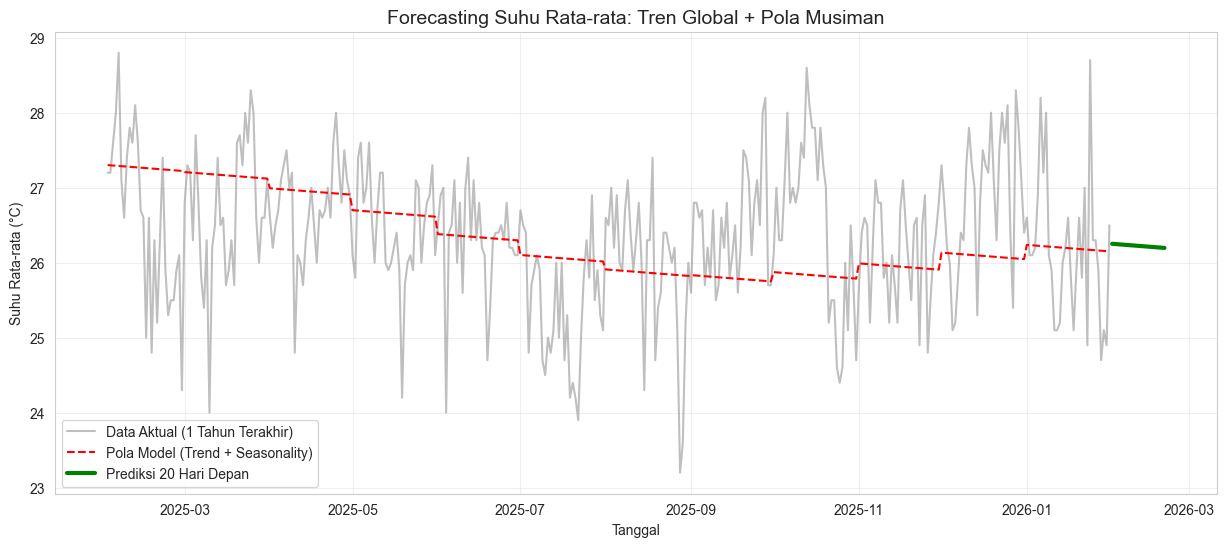


== Tabel Prediksi Suhu 20 Hari Ke Depan ==
            Prediksi_TAVG
2026-02-01          26.25
2026-02-02          26.25
2026-02-03          26.25
2026-02-04          26.24
2026-02-05          26.24
2026-02-06          26.24
2026-02-07          26.23
2026-02-08          26.23
2026-02-09          26.23
2026-02-10          26.23


In [440]:
# Visualisasi Hasil Forecasting

plt.figure(figsize=(15, 6))

# Plot Data Aktual (Ambil 1 tahun terakhir biar grafik tidak terlalu padat)
plt.plot(df_forecast.index[-365:], df_forecast['TAVG'][-365:], 
         label='Data Aktual (1 Tahun Terakhir)', color='gray', alpha=0.5)

# Plot Pola Model pada Data Lama (Evaluasi Pola)
# Ini untuk menunjukkan bahwa model kita mengikuti gelombang musim, bukan garis lurus
y_pred_history = model_lr_season.predict(x)
plt.plot(df_forecast.index[-365:], y_pred_history[-365:], 
         color='red', linestyle='--', label='Pola Model (Trend + Seasonality)')

# Plot Prediksi Masa Depan (Hasil Akhir)
plt.plot(df_future.index, df_future['Prediksi_TAVG'], 
         color='green', linewidth=3, label=f'Prediksi {future_days} Hari Depan')

# Kosmetik Grafik
plt.title(f'Forecasting Suhu Rata-rata: Tren Global + Pola Musiman', fontsize=14)
plt.xlabel('Tanggal')
plt.ylabel('Suhu Rata-rata (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Tampilkan Tabel Hasil Prediksi
print(f"\n== Tabel Prediksi Suhu {future_days} Hari Ke Depan ==")
# Tampilkan dengan pembulatan 2 desimal
display_df = df_future[['Prediksi_TAVG']].copy()
display_df['Prediksi_TAVG'] = display_df['Prediksi_TAVG'].round(2)

# Tampilkan 10 hari pertama
print(display_df.head(10))

In [441]:
# # 1. Persiapan Data Khusus Linear Regression (Butuh Tanggal Numerik)
# # Kita gunakan df_clean yang sudah final dari tahap cleaning kamu
# df_linreg = df_clean.copy()
# df_linreg['Date_Ordinal'] = df_linreg.index.map(pd.Timestamp.toordinal)

# # Definisi X (Fitur) dan y (Target)
# x_trend = df_linreg[['Date_Ordinal']]
# y_trend = df_linreg['TAVG']

# # 2. Training Model Linear Regression (Full Data untuk Forecasting Maksimal)
# model_lr = LinearRegression()
# model_lr.fit(x_trend, y_trend)

# # Evaluasi Singkat Model Linear (Optional, untuk laporan)
# y_pred_history = model_lr.predict(x_trend)
# mae_lr = mean_absolute_error(y_trend, y_pred_history)
# rmse_lr = np.sqrt(mean_squared_error(y_trend, y_pred_history))
# print(f"MAE Linear Regression (Trend Fitting): {mae_lr:.4f}")
# print(f"RMSE Linear Regression (Trend Fitting): {rmse_lr:.4f}")


In [442]:
# # ------------------------------------------------------------------------------
# # 3. GENERATE 20 HARI KEDEPAN
# # ------------------------------------------------------------------------------

# # Tentukan berapa hari ke depan
# future_days = 20
# last_date = df_linreg.index[-1]

# # Buat range tanggal masa depan (mulai besoknya data terakhir)
# future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)

# # Buat DataFrame untuk masa depan
# df_future = pd.DataFrame(index=future_dates)
# df_future['Date_Ordinal'] = df_future.index.map(pd.Timestamp.toordinal)

# # Lakukan Prediksi
# future_pred = model_lr.predict(df_future[['Date_Ordinal']])
# df_future['Prediksi_TAVG'] = future_pred


In [443]:
# # ------------------------------------------------------------------------------
# # 4. VISUALISASI HASIL (GAYA SEPERTI NOTEBOOK TEMAN)
# # ------------------------------------------------------------------------------

# plt.figure(figsize=(15, 6))

# # Plot A: Data Aktual (Biru)
# plt.plot(df_linreg.index, df_linreg['TAVG'], label='Data Aktual (BMKG)', color='blue', alpha=0.5)

# # Plot B: Garis Tren Linear pada Data Lama (Merah Putus-putus)
# plt.plot(df_linreg.index, y_pred_history, color='red', linestyle='--', linewidth=2, label='Garis Tren Linear')

# # Plot C: Prediksi Masa Depan (Hijau Tebal)
# plt.plot(df_future.index, df_future['Prediksi_TAVG'], color='green', linewidth=4, label=f'Prediksi {future_days} Hari Depan')

# plt.title(f'Prediksi Suhu Rata-rata {future_days} Hari Ke Depan (Linear Trend)', fontsize=14)
# plt.xlabel('Tanggal')
# plt.ylabel('Suhu Rata-rata (°C)')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.show()

In [444]:
# # ------------------------------------------------------------------------------
# # 5. TAMPILKAN TABEL PREDIKSI
# # ------------------------------------------------------------------------------
# print(f"\n== Tabel Hasil Prediksi {future_days} Hari Ke Depan ==")
# # Format tampilan agar rapi
# display_df = df_future[['Prediksi_TAVG']].copy()
# display_df['Prediksi_TAVG'] = display_df['Prediksi_TAVG'].round(2) # Bulatkan 2 desimal
# print(display_df)

# # Simpan hasil prediksi ke CSV (Optional)
# # display_df.to_csv('hasil_prediksi_20_hari.csv')